In [81]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pprint

In [103]:
sents = ["What I cannot create, I do not understand.", "Intellectuals solve problems, geniuses prevent them.", "A person who never made a mistake never tied anything new.", "The same squations have the same solutions."]

labels = [1, 0, 0, 1] #1 for Richard Feynman, 2 for Albert Einstein

In [104]:
char_set = ["<pad>"] + sorted(list(set(" ".join(sents))))
idx2char = {idx:char for idx, char in enumerate(char_set)}
char2idx = {char:idx for idx, char in enumerate(char_set)}

In [105]:
print(char_set)
print(idx2char)
print(char2idx)

['<pad>', ' ', ',', '.', 'A', 'I', 'T', 'W', 'a', 'b', 'c', 'd', 'e', 'g', 'h', 'i', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'y']
{0: '<pad>', 1: ' ', 2: ',', 3: '.', 4: 'A', 5: 'I', 6: 'T', 7: 'W', 8: 'a', 9: 'b', 10: 'c', 11: 'd', 12: 'e', 13: 'g', 14: 'h', 15: 'i', 16: 'k', 17: 'l', 18: 'm', 19: 'n', 20: 'o', 21: 'p', 22: 'q', 23: 'r', 24: 's', 25: 't', 26: 'u', 27: 'v', 28: 'w', 29: 'y'}
{'<pad>': 0, ' ': 1, ',': 2, '.': 3, 'A': 4, 'I': 5, 'T': 6, 'W': 7, 'a': 8, 'b': 9, 'c': 10, 'd': 11, 'e': 12, 'g': 13, 'h': 14, 'i': 15, 'k': 16, 'l': 17, 'm': 18, 'n': 19, 'o': 20, 'p': 21, 'q': 22, 'r': 23, 's': 24, 't': 25, 'u': 26, 'v': 27, 'w': 28, 'y': 29}


In [106]:
sents_idx = [[char2idx[char] for char in sent] for sent in sents]

sents_len = [len(sent) for sent in sents]

In [107]:
print(sents_idx)
print(sents_len)

[[7, 14, 8, 25, 1, 5, 1, 10, 8, 19, 19, 20, 25, 1, 10, 23, 12, 8, 25, 12, 2, 1, 5, 1, 11, 20, 1, 19, 20, 25, 1, 26, 19, 11, 12, 23, 24, 25, 8, 19, 11, 3], [5, 19, 25, 12, 17, 17, 12, 10, 25, 26, 8, 17, 24, 1, 24, 20, 17, 27, 12, 1, 21, 23, 20, 9, 17, 12, 18, 24, 2, 1, 13, 12, 19, 15, 26, 24, 12, 24, 1, 21, 23, 12, 27, 12, 19, 25, 1, 25, 14, 12, 18, 3], [4, 1, 21, 12, 23, 24, 20, 19, 1, 28, 14, 20, 1, 19, 12, 27, 12, 23, 1, 18, 8, 11, 12, 1, 8, 1, 18, 15, 24, 25, 8, 16, 12, 1, 19, 12, 27, 12, 23, 1, 25, 15, 12, 11, 1, 8, 19, 29, 25, 14, 15, 19, 13, 1, 19, 12, 28, 3], [6, 14, 12, 1, 24, 8, 18, 12, 1, 24, 22, 26, 8, 25, 15, 20, 19, 24, 1, 14, 8, 27, 12, 1, 25, 14, 12, 1, 24, 8, 18, 12, 1, 24, 20, 17, 26, 25, 15, 20, 19, 24, 3]]
[42, 52, 58, 43]


In [154]:
seq_len = max(sents_len)

sents_idx_pad = tf.keras.preprocessing.sequence.pad_sequences(sequences=sents_idx, maxlen=seq_len, padding="post", truncating="post", value=0)

In [155]:
print(sents_idx_pad)

[[ 7 14  8 25  1  5  1 10  8 19 19 20 25  1 10 23 12  8 25 12  2  1  5  1
  11 20  1 19 20 25  1 26 19 11 12 23 24 25  8 19 11  3  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0]
 [ 5 19 25 12 17 17 12 10 25 26  8 17 24  1 24 20 17 27 12  1 21 23 20  9
  17 12 18 24  2  1 13 12 19 15 26 24 12 24  1 21 23 12 27 12 19 25  1 25
  14 12 18  3  0  0  0  0  0  0]
 [ 4  1 21 12 23 24 20 19  1 28 14 20  1 19 12 27 12 23  1 18  8 11 12  1
   8  1 18 15 24 25  8 16 12  1 19 12 27 12 23  1 25 15 12 11  1  8 19 29
  25 14 15 19 13  1 19 12 28  3]
 [ 6 14 12  1 24  8 18 12  1 24 22 26  8 25 15 20 19 24  1 14  8 27 12  1
  25 14 12  1 24  8 18 12  1 24 20 17 26 25 15 20 19 24  3  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0]]


In [163]:
n_cls = 2
hid_dims = [10, 10]

in_dim = len(char2idx)
out_dim = len(char2idx)
one_hot = np.eye(len(char2idx))

model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Embedding(input_dim=in_dim, output_dim = out_dim, trainable=False, mask_zero=True, input_length=seq_len, embeddings_initializer=tf.keras.initializers.Constant(one_hot)))
model.add(tf.keras.layers.SimpleRNN(units=hid_dims[0], return_sequences=True, return_state=False))
model.add(tf.keras.layers.TimeDistributed(tf.keras.layers.Dropout(rate=0.2)))
model.add(tf.keras.layers.SimpleRNN(units=hid_dims[1], return_sequences=False, return_state=False))
model.add(tf.keras.layers.Dropout(rate=0.2))
model.add(tf.keras.layers.Dense(units=n_cls))

In [164]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_8 (Embedding)      (None, 58, 30)            900       
_________________________________________________________________
simple_rnn_16 (SimpleRNN)    (None, 58, 10)            410       
_________________________________________________________________
time_distributed_8 (TimeDist (None, 58, 10)            0         
_________________________________________________________________
simple_rnn_17 (SimpleRNN)    (None, 10)                210       
_________________________________________________________________
dropout_17 (Dropout)         (None, 10)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 2)                 22        
Total params: 1,542
Trainable params: 642
Non-trainable params: 900
____________________________________________________

In [165]:
def loss_fn(model, x, y, training):
    logits = model(x, training)
    loss = tf.reduce_mean(tf.keras.losses.sparse_categorical_crossentropy(y_true=y, y_pred=logits, from_logits=True))
    return loss

lr = 0.01
epochs = 30
batch_size = 2
opt = tf.keras.optimizers.Adam(learning_rate=lr)

train = tf.data.Dataset.from_tensor_slices((sents_idx_pad, labels)).shuffle(len(sents_idx_pad)).batch(batch_size)

In [166]:
train_loss_hist = []
avg_train_loss = 0
for epoch in range(epochs):
    loss_sum = 0
    n_mn = 0
    for x_mb, y_mb in train:
        with tf.GradientTape() as tape:
            loss = loss_fn(model, x_mb, y_mb, training=True)
        grads = tape.gradient(loss, model.variables)
        opt.apply_gradients(zip(grads, model.variables))
        
        loss_sum += loss
        n_mn +=1       
    avg_train_loss = loss_sum/n_mn
    train_loss_hist.append(avg_train_loss)

    print(f"epoch : {epoch+1:>3d} | train_loss : {avg_train_loss.numpy():>6.3f}")

epoch :   1 | train_loss :  0.832
epoch :   2 | train_loss :  0.787
epoch :   3 | train_loss :  0.443
epoch :   4 | train_loss :  0.270
epoch :   5 | train_loss :  0.146
epoch :   6 | train_loss :  0.169
epoch :   7 | train_loss :  0.062
epoch :   8 | train_loss :  0.048
epoch :   9 | train_loss :  0.167
epoch :  10 | train_loss :  0.040
epoch :  11 | train_loss :  0.014
epoch :  12 | train_loss :  0.047
epoch :  13 | train_loss :  0.017
epoch :  14 | train_loss :  0.058
epoch :  15 | train_loss :  0.030
epoch :  16 | train_loss :  0.009
epoch :  17 | train_loss :  0.012
epoch :  18 | train_loss :  0.005
epoch :  19 | train_loss :  0.028
epoch :  20 | train_loss :  0.014
epoch :  21 | train_loss :  0.017
epoch :  22 | train_loss :  0.005
epoch :  23 | train_loss :  0.004
epoch :  24 | train_loss :  0.005
epoch :  25 | train_loss :  0.018
epoch :  26 | train_loss :  0.006
epoch :  27 | train_loss :  0.004
epoch :  28 | train_loss :  0.009
epoch :  29 | train_loss :  0.006
epoch :  30 | 

In [167]:
pred = model.predict(sents_idx_pad)
pred = np.argmax(pred, axis=-1)

acc = np.mean(pred==labels)

In [168]:
print(acc)

1.0


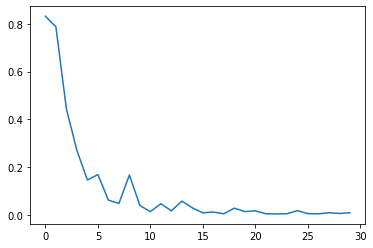

In [169]:
plt.plot(train_loss_hist)